# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].value_counts()

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points.
print(f"Number of unique mice: {len(combined_data['Mouse ID'].unique())}")
print(f"Number of mice with duplicate time points: {len(combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique())}")
# Display data of mouse ID with duplicate time points
combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

Number of unique mice: 249
Number of mice with duplicate time points: 1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mice_data.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
                                                        5          47.570392           0                   1
                                                                   48.786801           0                   1
                                                        10         49.880528           0                   1
                                                                   51.745156           0                   1
                                                        15         51.325852           1                   1
                                                                   53.442020           0                   1
                                                        20         54.657650           1                   1
                        

In [6]:
# Create a new DataFrame and drop the duplicate mouse by its ID
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_data.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_data['Mouse ID'].unique())
number_of_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats_dict = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
# Group the data by "Drug Regimen"
grouped_data = clean_data.groupby("Drug Regimen")

# Calculate each statistic separately
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting Series into a single summary DataFrame
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "Standard Deviation Tumor Volume": std_dev_tumor_volume,
    "SEM Tumor Volume": sem_tumor_volume
})
# Display the summary statistics DataFrame
summary_stats.head()


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = grouped_data.agg(stats_dict)
summary_stats_agg.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

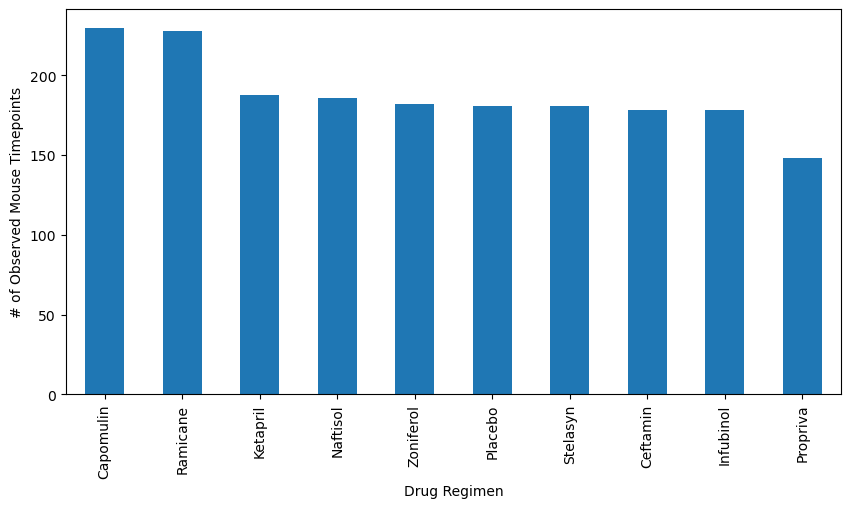

In [20]:
# Group by "Drug Regimen" and count the number of rows (Mouse ID/Timepoints) for each drug regimen
count_data = clean_data.groupby("Drug Regimen").size()

# Sort the count_data Series by its values in ascending order
count_data_sorted = count_data.sort_values(ascending=False)

# Create a bar plot using pandas Series.plot()
count_data_sorted.plot(kind="bar", figsize=(10,5), legend=False)

# Set the title and axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


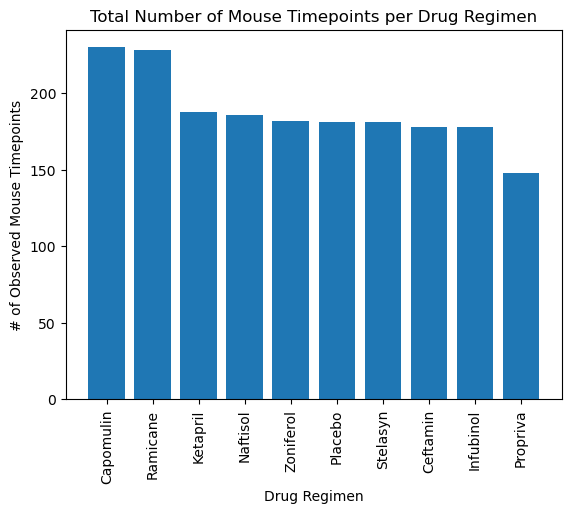

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by "Drug Regimen" and count the number of rows (Mouse ID/Timepoints) for each drug regimen
count_data = clean_data.groupby("Drug Regimen").size()

# Sort the count_data Series by its values in ascending order
count_data_sorted = count_data.sort_values(ascending=False)

# Create a bar plot using pyplot
plt.bar(count_data_sorted.index, count_data_sorted.values)

# Set the title and axis labels
plt.title("Total Number of Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

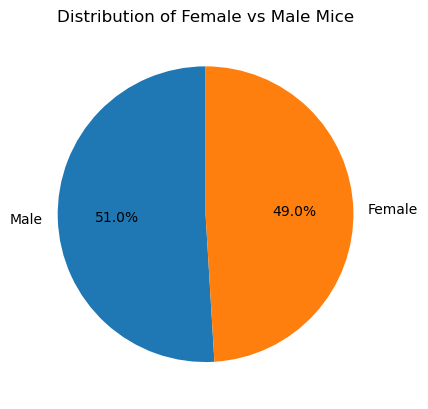

In [28]:
# Count the number of mice for each gender
gender_counts = clean_data["Sex"].value_counts()

# Create a pie chart using Pandas
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)

# Set the title and axis labels
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")
plt.show()



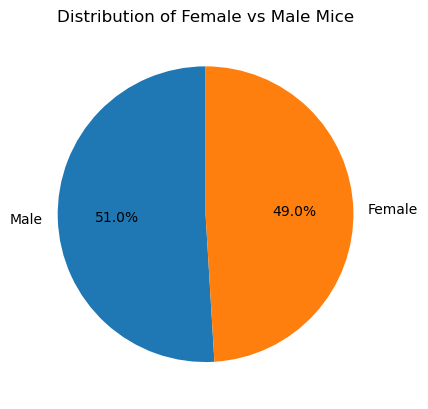

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of mice for each gender
gender_counts = clean_data["Sex"].value_counts()

# Create a pie chart using pyplot
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)

# Set the title and axis labels
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")

plt.show()


## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = clean_data[clean_data['Drug Regimen'].isin(treatments)]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(last_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')
tumor_volumes = final_tumor_volume['Tumor Volume (mm3)']




In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    final_tumor_volume_for_treatment = subset['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume_for_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    treatment_outliers = final_tumor_volume_for_treatment[(final_tumor_volume_for_treatment < lower_bound) | (final_tumor_volume_for_treatment > upper_bound)]
    print(f"{treatment} potential outliers: {treatment_outliers}")



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


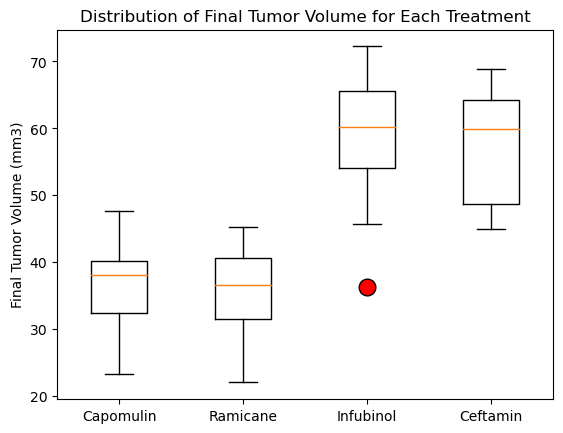

In [61]:
tumor_volumes_list = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].tolist() for treatment in treatments]

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define outlier properties
red_outlier = dict(markerfacecolor='red', marker='o', markersize=12)

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Distribution of Final Tumor Volume for Each Treatment')
ax1.boxplot(tumor_volumes_list, labels=treatments, flierprops=red_outlier)  # Here's where you specify the outlier properties
plt.show()


## Line and Scatter Plots

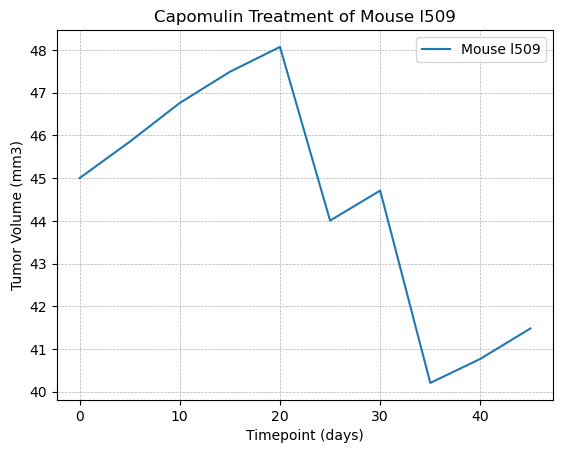

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
